# 1. Bagging - Bootstrap Aggregating

    - 예측기의 분산을 줄여주는 앙상블 메타알고리즘이다.
    - 배깅은 훈련 데이터의 여러 변형에 대해 독립적으로 다수의 모델을 적합한다.
    - 훈련 데이터의 변형은 부트스트랩 재추출이라는 과정을 거쳐 생성된다.

### Bootstarp

원시 표본에서 무작위 추출을 통해서 다수의 변형을 생성한다. 모든 변형 표본은 원시 데이터와 동일한 개수의 관측치를 가지며 모든 관측치를 포함할 수도 포함하지 않을 수도 있다. 각 변형에 대해 통계량을 구하고 이 통계량을 이용해 신뢰구간을 설정하고 표준 오차를 계산하는 등의 방법으로 불확실성을 줄인다. 이 방법은 관측치의 표본이 독립적으로 추출됐을 때만 사용할 수 있다.

In [1]:
import numpy as np

sample = np.random.randint(low=1, high=100, size=10)
print("Original Sample: %s" %sample)
print("Sample mean: %s" % sample.mean())

Original Sample: [69 87 94 99 72 81 72 37  1 92]
Sample mean: 70.4


In [2]:
### bootstrap
resamples = [np.random.choice(sample, size=sample.size) for i in range(100)]
print("Number of bootstrap resamples: %s" % len(resamples))
print("Example re-sample: %s" % resamples[0])
resample_means = np.array([resample.mean() for resample in resamples])
print("Mean of resamples\' means: %s" % resample_means.mean())

Number of bootstrap resamples: 100
Example re-sample: [69 69 99 37 99 99 94 72 99 94]
Mean of resamples' means: 69.20499999999998


### Bagging

- Bagging은 의사결정 트리와 같이 높은 분산과 낮은 편향을 가진 예측기에 유용한 메타알고리즘이다. Ranndom Forest의 전체 트리 개수는 중요한 Hyperparamterdㅣ다. 이 숫자가 증가하면 계산 복잡도가 증가하지만 모델의 성능은 향상된다. 

- 가지치기나 잎 노드별 최소 훈련 인스턴스 개수 등의 정규화 기법은 개별 예측기에 비해 그다지 중요하지 않다. 배깅 자체에 일종의 정규화 과정이 포함되어 있기 때문이다. 랜덤 포레스트는 각 노드에서 랜덤으로 설정한 특징 중 최고인 특징을 선택한다. 

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# make classification dataset
X, y = make_classification(n_samples = 1000, n_features= 100, n_informative=20, n_clusters_per_class=2, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [4]:
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.73      0.66      0.69       127
          1       0.68      0.75      0.71       123

avg / total       0.71      0.70      0.70       250



In [5]:
clf = RandomForestClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.74      0.83      0.79       127
          1       0.80      0.70      0.75       123

avg / total       0.77      0.77      0.77       250



# 2. Boosting

- Adaboost를 비롯한 대부분의 부스팅 알고리즘은 약한 학습자로 모든 종류의 기초 예측기를 사용할 수 있다. 다음 반복 시 Adaboost는 훈련 인스턴스의 가중치를 조정하는데, 직전에 잘못 분류된 인스턴스에 대해서는 가중치를 올리고 제대로 분류된 인스턴스에 대해서는 가중치를 감소시킨다. 그런 다음 다른 약한 학습자를 가중치가 조정된 인스턴스를 상대로 훈련시킨다. 후속 학습자들은 점진적으로 앙상블이 잘못 예측한 인스턴스에 더 집중하게 된다. 알고리즘은 완벽한 성능에 도달하거나 미리 설정한 반복 횟수에 도달하면 멈춘다. 앙상블은 기초 예측기들의 예측을 가중 합산해 예측한다.

In [6]:
%matplotlib inline

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
X, y = make_classification(n_samples=1000, n_features=50, n_informative=30, n_clusters_per_class=3, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [10]:
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print("Decision tree accuracy: %s" %clf.score(X_test, y_test))

Decision tree accuracy: 0.688


In [11]:
clf = AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=11)

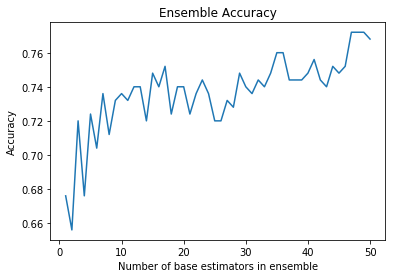

In [17]:
accuracies = []
accuracies.append(clf.score(X_test, y_test))
plt.title("Ensemble Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of base estimators in ensemble")
plt.plot(range(1, 51), [accuracy for accuracy in clf.staged_score(X_test, y_test)])

# 3. Stacking

- Stacking은 앙상블을 만드는 접근 방식을 말하는 것으로 메타 예측기를 사용해서 기초 예측기들의 예측을 병합한다. 종종 혼성 기법이라고 불리는 이 방법은 두 번째 지도 학습을 추가하는 것으로 볼 수 있다. 즉, 반응 변수를 예측하려면 기초 예측기들의 예측을 사용해 메타예측기를 훈련시켜야 한다. 스태킹된 앙상블을 훈련시키려면 먼저 훈련 집합을 사용해 기초 예측기를 훈련시킨다. 배깅과 부스팅과는 달리 스태킹은 종류가 서로 다른 기초 예측기를 사용할 수 있다. 예를 들어 랜덤 포레스트와 로지스틱 회귀를 함께 사용할 수도 있다. 메타예측기의 훈련 집합으로는 기초 예측기의 예측과 실제 데이터를 사용한다. 메타예측기는 단순한 투표나 평균화 방식보다 더 복잡한 방식으로 예측기를 병합해 학습한다.

In [20]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone, BaseEstimator, TransformerMixin, ClassifierMixin

In [21]:
class StackingClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()
        
    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
            
        self.meta_classifier.fit(self._get_meta_features(X), y)
        return self
        
    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1)
        
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))
    
    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))
    
    X, y = make_classification(
        n_samples=1000, n_features=50, n_informative=30,
        n_clusters_per_class=3, random_state=11)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic regression accuracy: %s" % lr.score(X_test, y_test))

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print("KNN accuracy: %s" % knn_clf.score(X_test, y_test))

Logistic regression accuracy: 0.816
KNN accuracy: 0.836


In [ ]:
base_classifiers = [lr, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print("Stacking classifier accuracy: %s" stacking_clf.score(X))